In [1]:
from d3blocks import D3Blocks
import pandas as pd
import numpy as np

import copy, os

In [2]:
import d3blocks
d3blocks.__version__

from IPython.display import IFrame

In [3]:
import pickle

def save_pickle(out_path, data):
    with open(out_path, 'wb') as handle:
        pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

def load_pickle(pickle_path):
    with open(pickle_path, 'rb') as handle:
        return pickle.load(handle)

In [116]:
import reeds
from pygromos.files.repdat import Repdat, ExpandedRepdat

from reeds.function_libs.analysis.sampling import analyse_state_transitions

from typing import List
import matplotlib.pyplot as plt
import matplotlib as mpl

In [5]:
# Notebook based on https://stackoverflow.com/questions/67961842/chord-diagram-in-python

In [6]:
def to_dataframe(matrix, labels=None):
    """
    Convert np.array (matrix) to a pandas dataframe
    """
    n_states, _ = np.shape(matrix)
    new_df = pd.DataFrame()
    
    sources = np.repeat(np.arange(0, n_states), n_states-1)
    
    if labels is None:
        new_df['source'] = sources
    else:
        new_df['source'] = [labels[i] for i in sources]
        
    targets = np.array([])

    for exclude in range(n_states):
        tmp = np.delete(np.arange(0, n_states), exclude)

        targets = np.append(targets, tmp)
    
    if labels is None:
        new_df['target'] = np.array(targets, dtype=int)
    else:
        new_df['target'] = [labels[int(i)] for i in targets]
    
    weights = np.zeros(len(targets)) 

    for k, (s, t) in enumerate(zip(sources, targets)):

        weights[k] = matrix[int(s)][int(t)]
    new_df['weight'] = weights
    
    return new_df

# Load Repdats back from pickles! 

In [7]:
basedir = '//fileserver/pine/pine2/cchampion/REEDS/2_protonation/paper_programs/notebooks/repdats/pickled'

repdats = [load_pickle(f'{basedir}/FXa_complex_seed{i}_repdat.pkl') for i in range(1, 6)]
# repdats = [load_pickle(f'{basedir}/FXa_ligands_seed{i}_repdat.pkl') for i in range(1, 6)]

### convert to expanded repdat

In [8]:
exp_repdats = [ExpandedRepdat(r) for r in repdats]

In [9]:
tr_matrices = [analyse_state_transitions(er, normalize= False, bidirectional =False) for er in exp_repdats]

In [10]:
tr_matrices2 = [analyse_state_transitions(er, normalize= False, bidirectional =False, min_s=2) for er in exp_repdats]

# Work with the data (FXa)

In [26]:
labels= ['1a', '1b', '2a', '2b', '3a', '3b', '4a', '4b', '5a', '5b', '6a', '6b', '7a', '7b', '8a', '8b']

In [27]:
df = to_dataframe(np.sum(tr_matrices, axis=0), labels)

In [28]:
df2 = to_dataframe(np.sum(tr_matrices2, axis=0), labels)

In [25]:
# Try taking the log 
df_logged = copy.deepcopy(df)
tmp = df['weight']
tmp[tmp == 0] = 1
df_logged['weight'] = np.log(tmp) # tmp ** (1/3)  #np.sqrt(tmp)

/tmp/ipykernel_1224927/2506360848.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp[tmp == 0] = 1


# Plot 

In [39]:
def make_chord_diagram_fxa(df, outfile, labels, cmap = 'magma'):
    d3 = D3Blocks(chart='Chord', frame=False,)

    d3.config['fontsize'] = 18
    d3.config['ordering'] = ''
    d3.config['arrowhead'] = 1
    d3.config['filepath'] = outfile
    d3.config['figsize'] = [600, 600]
    d3.config['notebook'] = True
    d3.config['save_button'] = True

    d3.set_node_properties(df, opacity=1, cmap=cmap, fontsize=18)
    d3.set_edge_properties(df, color='source', opacity=0.8)

    d3.show()
    
    return d3

# Plot the exchanges at s=1 and s=2 for FXa

In [40]:
cur_cwd = os.getcwd()
outfile = f"{cur_cwd}/d3blocks_file_fxa_s1.html"


d3 = make_chord_diagram_fxa(df2, outfile, labels, cmap='viridis')

IFrame('d3blocks_file_fxa_s1.html', width=600, height=600)

[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Chord]
[d3blocks] >INFO> filepath is set to [/tmp/d3blocks/chord.html]
[d3blocks] >INFO> Node properties are set.
[d3blocks] >INFO> Edge properties are set.
[d3blocks] >INFO> File already exists and will be overwritten: [/fileserver/pine/pine2/cchampion/REEDS/2_protonation/paper_programs/notebooks/d3blocks_file_fxa_s1.html]
[d3blocks] >INFO> Display in notebook using IPython.


# Do the same for the GSK3b dataset

In [201]:
def make_chord_diagram_gsk(df, outfile, all_colors=None):
    d3 = D3Blocks(chart='Chord', frame=False,)
    
    labels = ['9a', '9b', '10a', '10b', '11a', '11b', '12a', '12b', '13a', '13b', '14a', '14b', '15a', '15b', '16a', '16b']
    cmap = 'viridis'
    
    d3.config['fontsize'] = 18
    d3.config['ordering'] = ''
    d3.config['arrowhead'] = 1
    d3.config['filepath'] = outfile
    d3.config['figsize'] = [600, 600]
    d3.config['notebook'] = True
    d3.config['save_button'] = True

    d3.set_node_properties(df, opacity=1, cmap=cmap, fontsize=18)
    d3.set_edge_properties(df, color='source', opacity=0.8)
    
    if all_colors is not None:
        for i in range(0, 16):
            d3.node_properties.get(labels[i])['color'] = all_colors[i]
            d3.edge_properties.loc[d3.edge_properties['source'] == labels[i], 'color'] = all_colors[i]
    
    d3.show()
    
    return d3

In [58]:
basedir = '/fileserver/pine/pine2/cchampion/REEDS/2_protonation/paper_programs/notebooks/repdats/pickled'
repdats = [load_pickle(f'{basedir}/GSK3b_complex_10ns_seed{i}_repdat.pkl') for i in range(1, 6)]

In [59]:
exp_repdats = [ExpandedRepdat(r) for r in repdats]

In [60]:
tr_matrices = [analyse_state_transitions(er, normalize= False, bidirectional =False) for er in exp_repdats]

In [61]:
tr_matrices_norm = [analyse_state_transitions(er, normalize=True, bidirectional =False) for er in exp_repdats]

In [62]:
tr_matrices_mins = [analyse_state_transitions(er, normalize=False, bidirectional =False, min_s = 2) for er in exp_repdats]

In [63]:
tr_matrices_mins_norm = [analyse_state_transitions(er, normalize=True, bidirectional =False, min_s = 2) for er in exp_repdats]

/home/cchampion/programs/reeds/reeds/function_libs/analysis/sampling.py:401: RuntimeWarning: invalid value encountered in divide
  transition_counts = transition_counts / tot_trans[:, np.newaxis]
/home/cchampion/programs/reeds/reeds/function_libs/analysis/sampling.py:401: RuntimeWarning: invalid value encountered in divide
  transition_counts = transition_counts / tot_trans[:, np.newaxis]
/home/cchampion/programs/reeds/reeds/function_libs/analysis/sampling.py:401: RuntimeWarning: invalid value encountered in divide
  transition_counts = transition_counts / tot_trans[:, np.newaxis]


In [202]:
labels = ['9a', '9b', '10a', '10b', '11a', '11b', '12a', '12b', '13a', '13b', '14a', '14b', '15a', '15b', '16a', '16b']

In [203]:
df = to_dataframe(np.sum(tr_matrices, axis=0), labels)

In [204]:
df_mins = to_dataframe(np.sum(tr_matrices_mins, axis=0), labels)

In [205]:
df_norm = to_dataframe(np.sum(tr_matrices_mins_norm, axis=0), labels)

In [68]:
df_logged = copy.deepcopy(df)
tmp = df['weight']
tmp[tmp == 0] = 1
df_logged['weight'] = np.log(tmp)

/tmp/ipykernel_1224927/3885444208.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp[tmp == 0] = 1


# Plot the data

In [206]:
# PRGn or PiYG

['#054e20',
 '#11652d',
 '#1f7b39',
 '#3a924c',
 '#55aa5e',
 '#72bc75',
 '#93d090',
 '#afdfa9',
 '#c5e8bf',
 '#daf0d4',
 '#e7f3e4',
 '#f4f6f3',
 '#e1cde4',
 '#b08dbf',
 '#7f3c8d',
 '#40004b']

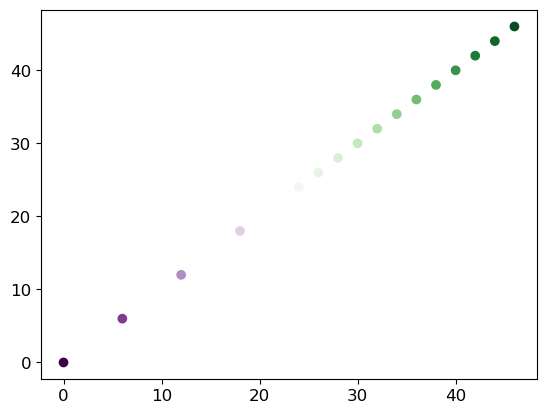

In [207]:
cmap = plt.cm.PRGn(np.linspace(0,1,48))
fig, ax = plt.subplots(dpi=100)

x = np.arange(48)

ax.scatter(x[0:24:6], x[0:24:6], c=cmap[0:24:6])
ax.scatter(x[24:48:2], x[24:48:2], c=cmap[24:48:2])

all_colors = []
for c in cmap[24:48:2][::-1]:
    all_colors.append(mpl.colors.to_hex(c))
for c in cmap[0:24:6][::-1]:
    all_colors.append(mpl.colors.to_hex(c))

all_colors

In [208]:
all_colors

['#054e20',
 '#11652d',
 '#1f7b39',
 '#3a924c',
 '#55aa5e',
 '#72bc75',
 '#93d090',
 '#afdfa9',
 '#c5e8bf',
 '#daf0d4',
 '#e7f3e4',
 '#f4f6f3',
 '#e1cde4',
 '#b08dbf',
 '#7f3c8d',
 '#40004b']

In [209]:
cmap[24:48:2][::-1][0]

array([0.02076125, 0.30665129, 0.12741253, 1.        ])

In [210]:
 cmap[0:24:6][::-1]

array([[0.88312188, 0.80246059, 0.89442522, 1.        ],
       [0.68827374, 0.55332564, 0.74809689, 1.        ],
       [0.49773164, 0.23467897, 0.55371011, 1.        ],
       [0.25098039, 0.        , 0.29411765, 1.        ]])

In [211]:
%matplotlib inline
colors = ['#C9C9E4', '#5254a3'] # first color is black, last is red
cm = LinearSegmentedColormap.from_list(
        "Custom", colors, N=12)
mat = np.indices((10,10))[1]
#plt.imshow(mat, cmap=cm)
#plt.show()

blues = [mpl.colors.to_hex(cm(i)) for i in range(12)]

In [212]:
%matplotlib inline
colors = ['#CF8C8D', '#ad494a'] # first color is black, last is red
cm = LinearSegmentedColormap.from_list(
        "Custom", colors, N=4)
mat = np.indices((10,10))[1]
#plt.imshow(mat, cmap=cm)
#plt.show()

reds = [mpl.colors.to_hex(cm(i)) for i in range(4)]

In [213]:
all_colors

['#054e20',
 '#11652d',
 '#1f7b39',
 '#3a924c',
 '#55aa5e',
 '#72bc75',
 '#93d090',
 '#afdfa9',
 '#c5e8bf',
 '#daf0d4',
 '#e7f3e4',
 '#f4f6f3',
 '#e1cde4',
 '#b08dbf',
 '#7f3c8d',
 '#40004b']

In [224]:
cur_cwd = os.getcwd()
outfile = f"{cur_cwd}/d3blocks_file_GSK_all_s.html"

make_chord_diagram_gsk(df, outfile, all_colors=all_colors)

IFrame('d3blocks_file_GSK_all_s.html', width=600, height=600)

[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Chord]
[d3blocks] >INFO> filepath is set to [/tmp/d3blocks/chord.html]
[d3blocks] >INFO> Node properties are set.
[d3blocks] >INFO> Edge properties are set.
[d3blocks] >INFO> Display in notebook using IPython.


In [225]:
cur_cwd = os.getcwd()
outfile = f"{cur_cwd}/d3blocks_file_GSK_s1.html"

make_chord_diagram_gsk(df_mins, outfile, all_colors=all_colors)

IFrame('d3blocks_file_GSK_s1.html', width=600, height=600)

[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Chord]
[d3blocks] >INFO> filepath is set to [/tmp/d3blocks/chord.html]
[d3blocks] >INFO> Node properties are set.
[d3blocks] >INFO> Edge properties are set.
[d3blocks] >INFO> Display in notebook using IPython.
